In [29]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.metrics 
import scipy
import pandas as pd
from matplotlib import cm
from scipy import interpolate
from scipy.interpolate import interp1d

np.set_printoptions(precision = 3)
np.set_printoptions(suppress = True)

In [74]:
# Import data
address = 'data/Data_SOLMAT.xlsx'
df = pd.read_excel(address,sheet_name = 'Trial',usecols = [0],names = None, nrows = 6)
df_li_Temp = df.values.tolist()
df = pd.read_excel(address,sheet_name = 'Trial',usecols = [1],names = None, nrows = 6)
df_li_s_HF = df.values.tolist()

In [76]:
Xtrain = np.array(df_li_Temp).reshape(6,1)
noise = 0
ytrain = np.array(df_li_s_HF).T
n_t = len(Xtrain)

In [77]:
Xtest = np.array(df_li_Temp).T.reshape((6))
noise = 0
ytest = np.array(df_li_s_HF).T.reshape((6))
print(Xtest)

[0.  0.2 0.4 0.6 0.8 1. ]


[0.    0.01  0.02  0.03  0.04  0.051 0.061 0.071 0.081 0.091 0.101 0.111
 0.121 0.131 0.141 0.152 0.162 0.172 0.182 0.192 0.202 0.212 0.222 0.232
 0.242 0.253 0.263 0.273 0.283 0.293 0.303 0.313 0.323 0.333 0.343 0.354
 0.364 0.374 0.384 0.394 0.404 0.414 0.424 0.434 0.444 0.455 0.465 0.475
 0.485 0.495 0.505 0.515 0.525 0.535 0.545 0.556 0.566 0.576 0.586 0.596
 0.606 0.616 0.626 0.636 0.646 0.657 0.667 0.677 0.687 0.697 0.707 0.717
 0.727 0.737 0.747 0.758 0.768 0.778 0.788 0.798 0.808 0.818 0.828 0.838
 0.848 0.859 0.869 0.879 0.889 0.899 0.909 0.919 0.929 0.939 0.949 0.96
 0.97  0.98  0.99  1.   ]


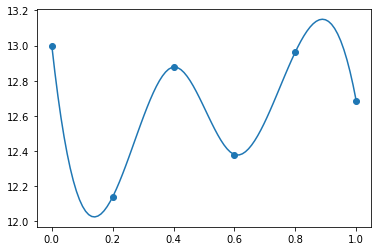

In [80]:
s = interpolate.InterpolatedUnivariateSpline(Xtest, ytest)
n_s = 100
X_uni = np.linspace(0,1,n_s)
y_uni = s(X_uni)
print(X_uni)
plt.scatter(Xtrain,ytrain)
plt.plot(X_uni,y_uni,'-')

In [84]:
Xtest = np.linspace(0,1,n_s).reshape(-1,1)
ytest = s(Xtest)

In [82]:
# Define the kernal funcion - RBF

def kernel(a, b, l=1, sig_var =1):
    distance = sklearn.metrics.pairwise_distances(a,b)
    return sig_var*np.exp(-1/(2*1**2)*distance**2)

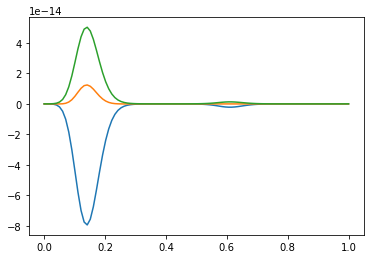

In [89]:
#Prior
#draw 3 gaussians from this kernal
K_ss = kernel(Xtest,ytest)
f_prior = np.random.multivariate_normal(mean=np.zeros(n_s), cov=K_ss, size = 3).T

plt.plot(Xtest,f_prior)
plt.show()

In [ ]:
K = kernal(Xtrain, Xtrain)
noise = 0
K_inv = 